<a href="https://colab.research.google.com/github/hevendra630/wine-quality-prediction-logistic-regression/blob/main/wine_quality_Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logistic Regression Accuracy: 0.8246153846153846


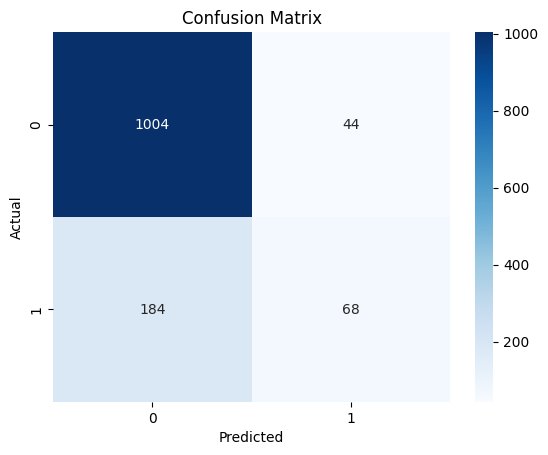

              precision    recall  f1-score   support

    Not Good       0.85      0.96      0.90      1048
        Good       0.61      0.27      0.37       252

    accuracy                           0.82      1300
   macro avg       0.73      0.61      0.64      1300
weighted avg       0.80      0.82      0.80      1300



In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df_red = pd.read_csv('winequality-red.csv', sep=';')
df_white = pd.read_csv('winequality-white.csv', sep=';')
df = pd.concat([df_red, df_white], ignore_index=True)

# Create binary classification target
df['label'] = df['quality'].apply(lambda q: 1 if q >= 7 else 0)

# Features and labels
X = df.drop(['quality', 'label'], axis=1)
y = df['label']

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predict
y_pred = log_model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", acc)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred, target_names=["Not Good", "Good"]))


In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

--2025-06-30 12:19:33--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘winequality-white.csv.1’

winequality-white.c     [ <=>                ] 258.23K  --.-KB/s    in 0.05s   

2025-06-30 12:19:33 (5.45 MB/s) - ‘winequality-white.csv.1’ saved [264426]

